# Summer surface

We wish to use the summer surface as reference to subtract from the other scans.

In [8]:
%run little_awk_functions.py

In [9]:
import xarray as xr

In [10]:
ds = xr.open_mfdataset('/home/mabonnet/Desktop/data/2021_2022_livox_surfaces/202107*.nc')

In [11]:
ds = ds.ffill(dim='time')

In [5]:
ds['snow_surface'] = ds['surface'].rolling({'x': 9, 'y': 9}, center=True).median()
ds['snow_surface'] = ds['snow_surface'].rolling(time=43, center=True).median()

/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


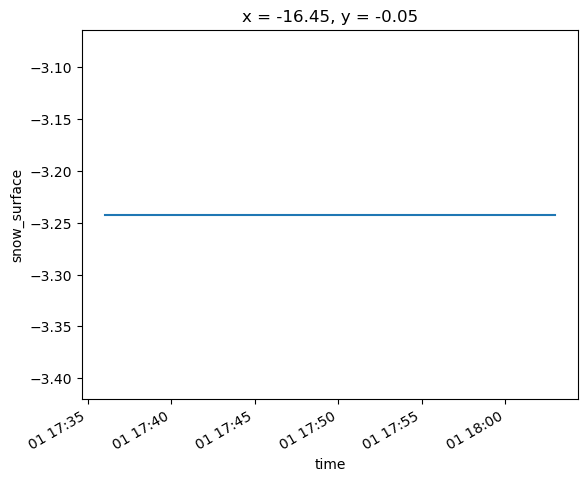

In [6]:
ds.snow_surface.isel(x=35, y=46).plot()

In [12]:
data_summer = xr.open_dataset('summer_surface.nc')
data_summer

<xarray.Dataset>
Dimensions:       (x: 201, y: 91)
Coordinates:
    time          datetime64[ns] ...
  * x             (x) float64 -19.95 -19.85 -19.75 -19.65 ... -0.15 -0.05 0.05
  * y             (y) float64 4.55 4.45 4.35 4.25 ... -4.15 -4.25 -4.35 -4.45
Data variables:
    snow_surface  (y, x) float32 ...

<Figure size 640x480 with 0 Axes>

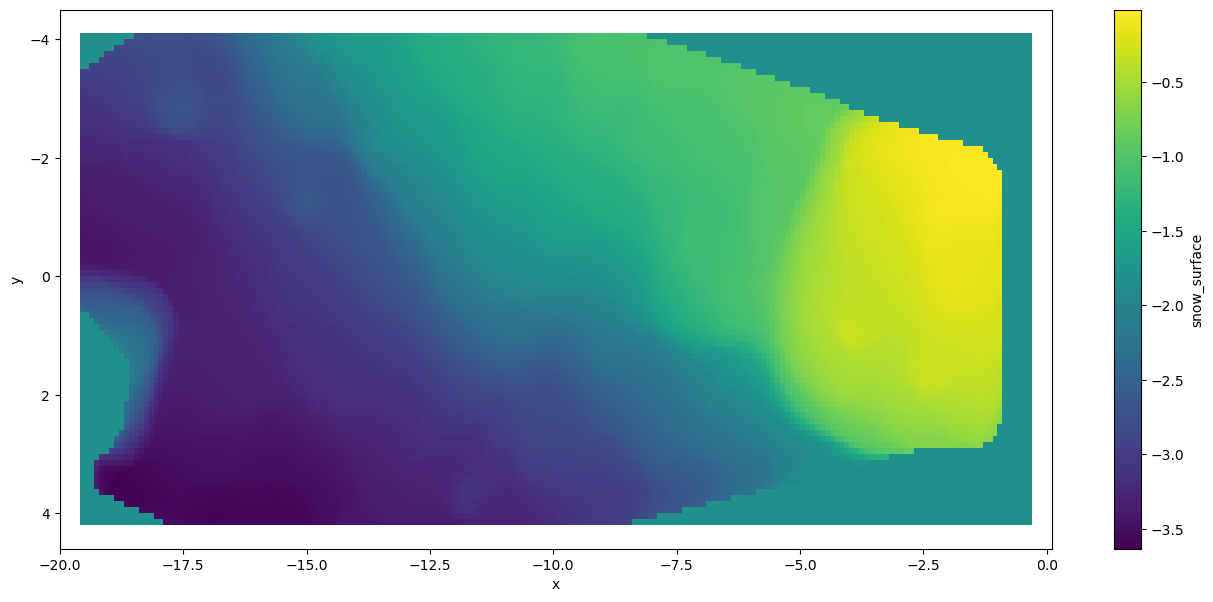

In [22]:
fig=plt.figure()
data_summer.snow_surface.plot(figsize=(16, 7))
plt.title(None)
plt.gca().invert_yaxis()

In [21]:
fig.savefig('summer_surf.png')

In [12]:
def make_summer_netcdf(ds, x_span=9, y_span=9, time_span=43):
    '''
    Function that cleans a dataset containing the summer lidar data and stores the median ground height in a netcdf file
    Args:
        ds: dataset containing the summer scans' data in a 'mean' variable
        x_span: x-span on which to apply median filtering, unit [index], default 9
        y_span: y-span on which to apply fmedian iltering, unit [index], default 9
        time_span: time-span on which to apply median filtering, unit [index], default 43
    Returns:
    '''
    ds.ffill(dim='time')
    ds['snow_surface'] = ds['mean'].rolling({'x': x_span, 'y': y_span}, center=True).median()
    ds['snow_surface'] = ds['snow_surface'].rolling(time=time_span, center=True).median()
    ds.snow_surface.isel(time=int(len(ds.time.values)/2)).to_netcdf('/home/mabonnet/github/MB_little_awk/summer_surface.nc')

In [13]:
winter_surf = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/2022*/202*.nc', chunks={'x': 20,'y': 20, 'time': 10})


/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/dask/array/core.py:4601: PerformanceWarning: Increasing numbe

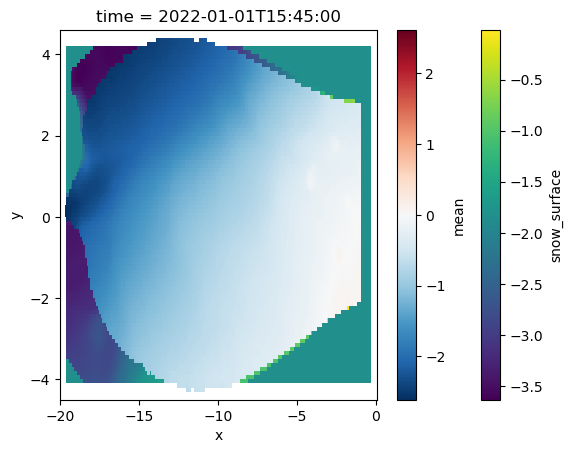

In [14]:
data_summer.snow_surface.plot()
winter_surf['mean'].isel(time=59).plot()

In [15]:
# TODO why is it not the same scale?? > it is, but in summer the surface is lower hehe

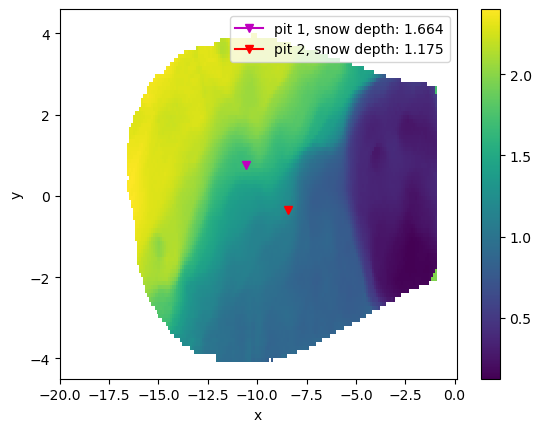

In [16]:
(winter_surf['mean'].isel(time=-1) - data_summer.snow_surface).plot()

depth_1 = str(round(float(winter_surf['mean'].isel(x=94, y=38, time=-1)-data_summer.snow_surface.isel(x=94, y=38)), 3))
depth_2 = str(round(float(winter_surf['mean'].isel(x=115, y=49, time=-1)-data_summer.snow_surface.isel(x=115, y=49)), 3))

plt.plot(winter_surf.x.values[94], winter_surf.y.values[38], c='m', marker='v', label='pit 1, snow depth: '+depth_1)
plt.plot(winter_surf.x.values[115], winter_surf.y.values[49], c='r', marker='v', label='pit 2, snow depth: '+depth_2)
plt.legend()


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.16409801, 1.26409801, 1.36409801, 1.46409801, 1.56409801,
        1.66409801, 1.76409801, 1.86409801, 1.96409801, 2.06409801,
        2.16409801]),
 <BarContainer object of 10 artists>)

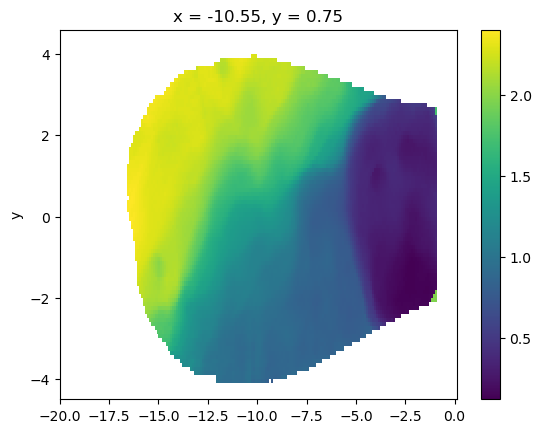

In [17]:
(winter_surf['mean'].isel(time=-1) - data_summer.snow_surface).plot()
(winter_surf['mean'].isel(time=-1) - data_summer.snow_surface).isel(x=94, y=38).plot(label='pit 1')

In [18]:
winter_surf['mean'].isel(time=59)

<xarray.DataArray 'mean' (y: 91, x: 201)>
dask.array<getitem, shape=(91, 201), dtype=float64, chunksize=(20, 20), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2022-01-01T15:45:00
  * x        (x) float64 -19.95 -19.85 -19.75 -19.65 ... -0.25 -0.15 -0.05 0.05
  * y        (y) float64 4.55 4.45 4.35 4.25 4.15 ... -4.15 -4.25 -4.35 -4.45

In [45]:
# from Simon > modified by me:

def define_summer_surface(ds, start, end):
    '''
    Function to define summer surface by taking the median along time axis a series of summer scans
    Args:
        ds: dataset to use
        start: start date
        end: end date

    Returns:
        add summer surface to dataset

    '''
    ds['summer_surface'] = ds['surface'].sel(time = slice(start, end)).median(dim='time')
    ds.summer_surface.attrs = {'units':'m', 'standard_name':'summer_surface',
                               'long_name':'Summer surface'}
    print(f'---> Summer surface defined based on scans from {start} to {end}')
    return()

In [23]:
dset = xr.open_mfdataset('/home/mabonnet/Desktop/data/2021_2022_livox_surfaces/202107*.nc')
dset

<xarray.Dataset>
Dimensions:  (time: 51, y: 91, x: 201)
Coordinates:
  * time     (time) datetime64[ns] 2021-07-01T16:30:00 ... 2021-07-01T20:45:00
  * x        (x) float64 -19.95 -19.85 -19.75 -19.65 ... -0.25 -0.15 -0.05 0.05
  * y        (y) float64 4.55 4.45 4.35 4.25 4.15 ... -4.15 -4.25 -4.35 -4.45
Data variables:
    surface  (time, y, x) float32 dask.array<chunksize=(51, 91, 201), meta=np.ndarray>
Attributes:
    descriptions:  ['min', 'max', 'mean', 'idw', 'count', 'stdev']
    is_tiled:      0
    nodatavals:    [-9999. -9999. -9999. -9999. -9999. -9999.]
    offsets:       [0. 0. 0. 0. 0. 0.]
    res:           [0.1 0.1]
    scales:        [1. 1. 1. 1. 1. 1.]
    transform:     [  0.1   0.  -20.    0.   -0.1   4.6]

In [43]:
define_summer_surface(dset, '2021/07/01-16h', '2021-07-01-18h')

<xarray.DataArray 'surface' (time: 48, y: 91, x: 201)>
dask.array<getitem, shape=(48, 91, 201), dtype=float32, chunksize=(48, 91, 201), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-07-01T16:30:00 ... 2021-07-01T18:57:00
  * x        (x) float64 -19.95 -19.85 -19.75 -19.65 ... -0.25 -0.15 -0.05 0.05
  * y        (y) float64 4.55 4.45 4.35 4.25 4.15 ... -4.15 -4.25 -4.35 -4.45
---> Summer surface defined based on scans from 2021/07/01-16h to 2021-07-01-18h


In [44]:
float(dset.summer_surface.isel(x=100, y=54))

-1.5534995794296265

# Testing the summer surface addition on a typical dataset

In [1]:
%run little_awk_functions.py
%run parameters.py

In [2]:
def define_summer_surface(ds, start, end):
    '''
    Function to define summer surface by taking the median along time axis a series of summer scans
    Args:
        ds: dataset to use
        start: start date
        end: end date

    Returns:
        add summer surface to dataset

    '''
    ds['summer_surface'] = ds['snow_surface'].sel(time = slice(start, end)).median(dim='time')
    ds.summer_surface.attrs = {'units':'m', 'standard_name':'summer_surface',
                               'long_name':'Summer surface'}
    print(f'---> Summer surface defined based on scans from {start} to {end}')
    return()

In [3]:
dataset_file_name = 'snow_pit_1_filled.nc'

start_summer_surface = '2021-12-06'
end_summer_surface =  '2021-12-07'

In [4]:
# Pre-processing to get clean data: assume the first scans are the summer surface for formal validation of the method

data_set_used = xr.open_dataset(dataset_file_name)

data_set_used = data_set_used.ffill(dim='time')

median_space_filtering(data_set_used, 5, x_span=9, y_span=9)
median_time_filtering(data_set_used, 11)

---> Median filtering in space with a window [9, 9]
---> Median filtering in time with a window of 11


---> Summer surface defined based on scans from 2021-12-06 to 2021-12-07
<xarray.Dataset>
Dimensions:         (time: 7776, x: 22, y: 22)
Coordinates:
  * time            (time) datetime64[ns] 2021-12-06 ... 2022-02-24T23:45:00
  * x               (x) float64 -11.55 -11.45 -11.35 ... -9.65 -9.55 -9.45
  * y               (y) float64 1.75 1.65 1.55 1.45 ... -0.05 -0.15 -0.25 -0.35
Data variables:
    mean            (time, y, x) float64 nan nan nan ... -0.4591 -0.4543 -0.45
    snow_surface    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    summer_surface  (y, x) float64 -1.45 -1.446 -1.44 ... -1.097 -1.089 -1.082


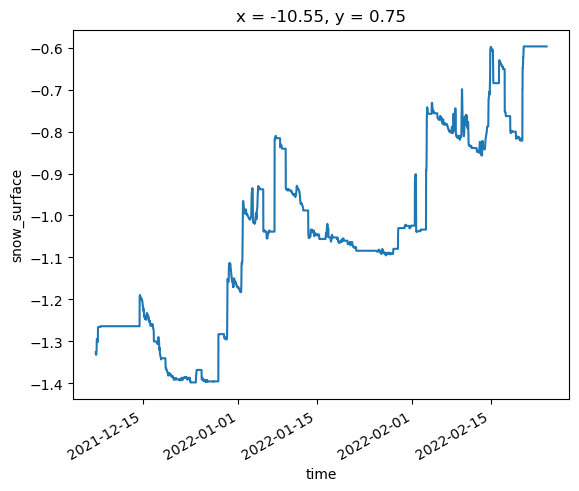

In [5]:
# Define the summer surface of the datset

define_summer_surface(data_set_used, start_summer_surface, end_summer_surface)
print(data_set_used)

data_set_used.snow_surface.isel(x=10, y=10).plot()

<xarray.Dataset>
Dimensions:         (time: 7776, x: 22, y: 22)
Coordinates:
  * time            (time) datetime64[ns] 2021-12-06 ... 2022-02-24T23:45:00
  * x               (x) float64 -11.55 -11.45 -11.35 ... -9.65 -9.55 -9.45
  * y               (y) float64 1.75 1.65 1.55 1.45 ... -0.05 -0.15 -0.25 -0.35
Data variables:
    mean            (time, y, x) float64 nan nan nan ... -0.4591 -0.4543 -0.45
    snow_surface    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    summer_surface  (y, x) float64 -1.45 -1.446 -1.44 ... -1.097 -1.089 -1.082


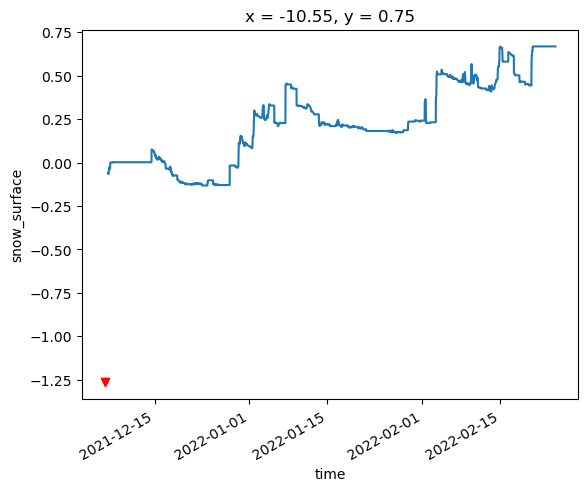

In [6]:
# Redefine the zero of the dataset

data_set_used['snow_surface'] = data_set_used['snow_surface'] - data_set_used['summer_surface']
print(data_set_used)

data_set_used.snow_surface.isel(x=10, y=10).plot()
plt.scatter('2021-12-06', data_set_used.summer_surface.isel(x=10, y=10), marker='v', c='r')

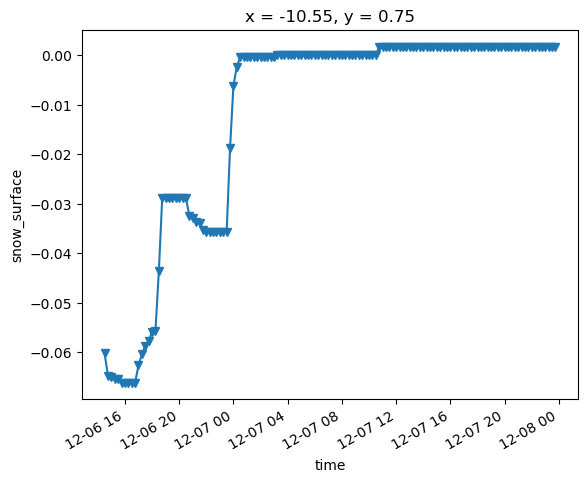

In [13]:
data_set_used['snow_surface'].sel(time = slice(start_summer_surface, end_summer_surface)).isel(x=10, y=10).plot(marker='v')

In [4]:
data_set_used = xr.open_dataset(dataset_file_name)
data_set_used

<xarray.Dataset>
Dimensions:  (time: 7776, x: 22, y: 22)
Coordinates:
  * time     (time) datetime64[ns] 2021-12-06 ... 2022-02-24T23:45:00
  * x        (x) float64 -11.55 -11.45 -11.35 -11.25 ... -9.75 -9.65 -9.55 -9.45
  * y        (y) float64 1.75 1.65 1.55 1.45 1.35 ... -0.05 -0.15 -0.25 -0.35
Data variables:
    mean     (time, y, x) float64 ...